In [1]:
# installing the kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Importing the dataset from kaggle
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:19<00:00, 50.6MB/s]
100% 812M/812M [00:19<00:00, 43.6MB/s]


In [4]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
dataset = '/content/train.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
# Count number of files in train folder
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:', file_count)


Number of images: 25000


In [7]:
# Printing the name of images
file_names = os.listdir('/content/train')
print(file_names)

['cat.10681.jpg', 'dog.574.jpg', 'cat.7157.jpg', 'cat.6207.jpg', 'cat.5260.jpg', 'dog.7.jpg', 'dog.8278.jpg', 'dog.12292.jpg', 'cat.12199.jpg', 'cat.4128.jpg', 'dog.11182.jpg', 'dog.534.jpg', 'cat.10537.jpg', 'dog.4971.jpg', 'cat.2651.jpg', 'dog.2157.jpg', 'cat.7319.jpg', 'dog.5944.jpg', 'cat.2220.jpg', 'cat.4641.jpg', 'dog.1243.jpg', 'cat.1584.jpg', 'dog.5241.jpg', 'dog.10713.jpg', 'dog.10627.jpg', 'cat.5603.jpg', 'dog.8153.jpg', 'dog.12049.jpg', 'dog.5842.jpg', 'dog.7484.jpg', 'cat.9265.jpg', 'cat.11549.jpg', 'cat.5613.jpg', 'cat.8537.jpg', 'dog.6426.jpg', 'cat.4728.jpg', 'cat.7474.jpg', 'cat.1799.jpg', 'dog.6874.jpg', 'dog.675.jpg', 'dog.5696.jpg', 'cat.8269.jpg', 'dog.174.jpg', 'cat.8222.jpg', 'cat.1836.jpg', 'dog.1563.jpg', 'dog.6393.jpg', 'cat.8455.jpg', 'cat.923.jpg', 'cat.819.jpg', 'cat.11937.jpg', 'dog.3763.jpg', 'cat.11336.jpg', 'dog.3116.jpg', 'dog.5093.jpg', 'dog.4715.jpg', 'cat.7092.jpg', 'dog.1995.jpg', 'cat.96.jpg', 'cat.8778.jpg', 'dog.5689.jpg', 'dog.1263.jpg', 'dog.50

In [8]:
# Importing the dependancies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

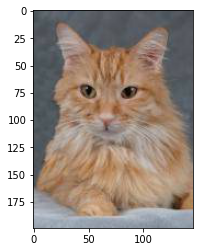

In [9]:
#Displaying the images of dogs and cats
img = mpimg.imread('/content/train/cat.3409.jpg')
imgplot = plt.imshow(img)
plt.show()

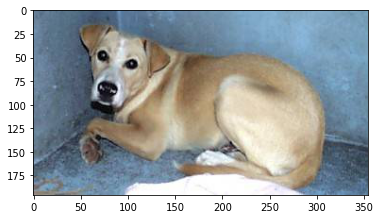

In [10]:
img = mpimg.imread('/content/train/dog.10384.jpg')
imgplot = plt.imshow(img)
plt.show()

In [11]:
# Resizing the images

for i in range (5):
  name = file_names[i]
  print(name[0:3])


cat
dog
cat
cat
cat


In [12]:
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count+=1
  else:
    cat_count+=1

print("DOGS:", dog_count)
cat_count


DOGS: 12500


12500

In [13]:
# Creating a directory for resized images
os.mkdir('/content/image resized')


In [14]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

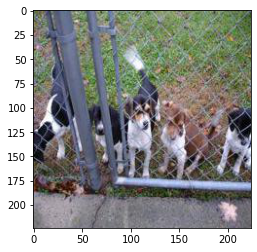

'dog.6421.jpg'

In [15]:
# Display resized dog image
img = mpimg.imread('/content/image resized/dog.10094.jpg')
imgplt = plt.imshow(img)
plt.show()
filename

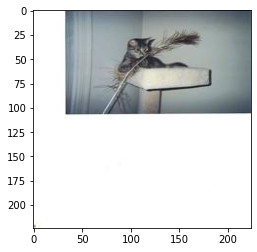

In [16]:
img = mpimg.imread('/content/image resized/cat.9983.jpg')
imgplt = plt.imshow(img)
plt.show()

In [17]:
# Creating Labels for Resized Images of Dogs and Cats
labels = []
filenames = os.listdir(resized_folder)
for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [18]:
# Counting the images of dogs and cats out of 2000 images
values, count = np.unique(labels, return_counts = True)
print(values)
count

[0 1]


array([ 991, 1009])

In [19]:
# Converting all the resized images to numpy arrays

In [20]:
import cv2
import glob

In [21]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [22]:
print(dog_cat_images)

[[[[ 51  59  66]
   [  0   4  11]
   [ 17  20  28]
   ...
   [  3   4   2]
   [  3   4   2]
   [  2   3   1]]

  [[ 58  66  73]
   [  0   8  15]
   [ 14  17  25]
   ...
   [  3   4   2]
   [  3   4   2]
   [  3   4   2]]

  [[ 67  75  82]
   [  6  14  21]
   [  9  12  20]
   ...
   [  2   4   4]
   [  2   4   4]
   [  2   4   4]]

  ...

  [[184 161 153]
   [185 165 154]
   [187 168 155]
   ...
   [136 120 114]
   [131 115 109]
   [129 113 107]]

  [[188 163 153]
   [186 164 153]
   [187 165 153]
   ...
   [142 126 120]
   [135 119 113]
   [130 114 108]]

  [[182 157 147]
   [180 155 145]
   [182 160 148]
   ...
   [147 131 125]
   [138 122 116]
   [131 115 109]]]


 [[[  2   9  12]
   [  8  15  18]
   [  4   7  15]
   ...
   [ 42  40  40]
   [ 47  45  45]
   [ 55  53  53]]

  [[  5  12  15]
   [  9  16  19]
   [  6  10  15]
   ...
   [ 47  45  45]
   [ 45  42  44]
   [ 45  43  43]]

  [[  8  16  16]
   [ 10  18  18]
   [  8  13  16]
   ...
   [ 42  41  43]
   [ 37  36  40]
   [ 34  33

In [23]:
type(dog_cat_images)

numpy.ndarray

In [24]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [25]:
x = dog_cat_images
y = np.asarray(labels)

In [26]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [27]:
# Scaling the data
X_train_scaled = x_train/255

X_test_scaled = x_test/255

In [28]:
print(X_train_scaled)

[[[[0.61960784 0.76470588 0.73333333]
   [0.67058824 0.80392157 0.77647059]
   [0.70980392 0.81568627 0.8       ]
   ...
   [0.38039216 0.61960784 0.65882353]
   [0.40784314 0.64313725 0.69019608]
   [0.43529412 0.67058824 0.71764706]]

  [[0.57647059 0.72156863 0.69019608]
   [0.61176471 0.74509804 0.71764706]
   [0.64705882 0.75294118 0.7372549 ]
   ...
   [0.48627451 0.72941176 0.76078431]
   [0.43921569 0.67843137 0.71764706]
   [0.39215686 0.63137255 0.67058824]]

  [[0.54117647 0.68627451 0.65490196]
   [0.55294118 0.68627451 0.65882353]
   [0.56862745 0.68627451 0.66666667]
   ...
   [0.47058824 0.70980392 0.7254902 ]
   [0.44705882 0.69019608 0.71372549]
   [0.45490196 0.69803922 0.72941176]]

  ...

  [[0.53333333 0.78039216 0.62352941]
   [0.41960784 0.66666667 0.50980392]
   [0.42745098 0.67058824 0.51372549]
   ...
   [0.45098039 0.82352941 0.67843137]
   [0.08235294 0.45882353 0.31372549]
   [0.33333333 0.72156863 0.57254902]]

  [[0.54509804 0.80392157 0.64313725]
   [0.4

In [29]:
# Building the neural network
import tensorflow as tf
import tensorflow_hub as hub

In [30]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [31]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [32]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 48s 875ms/step - loss: 0.1873 - acc: 0.9312
Epoch 2/5
50/50 [==============================] - 43s 867ms/step - loss: 0.0745 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 43s 864ms/step - loss: 0.0566 - acc: 0.9844
Epoch 4/5
50/50 [==============================] - 42s 840ms/step - loss: 0.0451 - acc: 0.9887
Epoch 5/5
11/50 [=====>........................] - ETA: 32s - loss: 0.0413 - acc: 0.9915

In [ ]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

Path of the image to be predicted: /content/dog.jpg


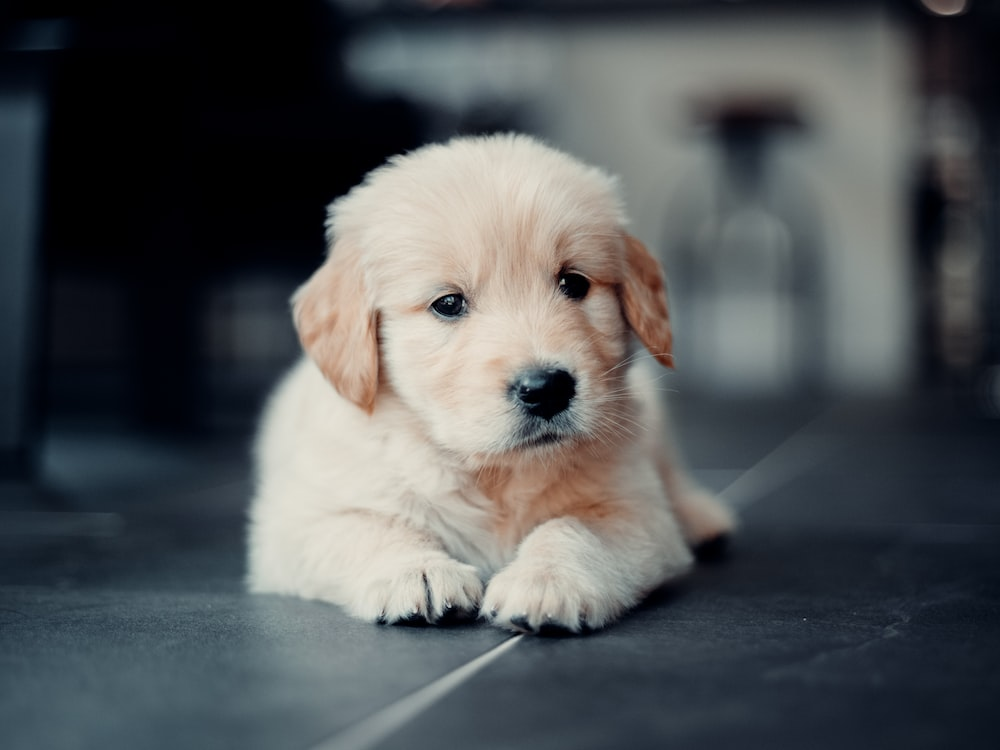

[[-4.819005   4.4977956]]
1
The image represents a Dog


In [35]:
# Predictive System
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')